<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/PredictStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from alpha_vantage.timeseries import TimeSeries

print("All libraries loaded")


All libraries loaded


In [8]:
# API KEY KUTDDOAHYS3Y94DS

In [5]:
#pip install alpha_vantage

In [59]:
config = {
    "alpha_vantage": {
        "key": "KUTDDOAHYS3Y94DS",
        "symbol": "IBM",
        "outputsize": "full",
        "key_adjusted_close": '5. adjusted close',
    },
    "data": {
        "window_size": 20,
        "train_split_size": 0.80,

    },
    "plots": {
        "xticks_interval": 90, # show every 90 days
        "color_actual": "#001f3f",
        "color_val": "#007409",
        "color_train": "#3D9970",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    },
    "model": {
        "input_size": 1,
        "num_lstm_layer": 2,
        "lstm_size": 32,
        "dropout": 0.2,
    },
    "training": {
        "device": "cpu", # "cuda" or "cpu"
        "batch_size": 64,
        "num_epoch": 100,
        "learning_rate": 0.01,
        "scheduler_step_size": 40,
    },

}

In [4]:
print(config["training"])

{'device': 'cpu', 'batch_size': 64, 'num_epoch': 100, 'learning_rate': 0.01, 'scheduler_step_size': 40}



### *Data Preparation*: Acquiring data from Alpha Vantage stock APIS
We will train the LSTM model to predict stock price moveents, Before we can buld this to predict the future, we need historical price data to train our deep learing model. To this end we will query the Alpha Vantage stock API via a popular Python wrapper. We are going to obtain 20 years of daily close prices for IBM from November 1999 to April 2023


In [72]:
def download_data(config):
  ts = TimeSeries(key = "demo") # Replay this with your API key
  data, meta_data = ts.get_daily_adjusted(config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])

  data_date = [date for date in data.keys()]
  data_date.reverse()

  data_close_price = []
  for date in data.keys():
    data_close_price.append(float(data[date][config["alpha_vantage"]["key_adjusted_close"]]))
  data_close_price.reverse()
  data_close_price = np.array(data_close_price)

  num_data_points = len(data_date)
  display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points-1]
  print("Number data points", num_data_points, display_date_range)

  return data_date, data_close_price, num_data_points, display_date_range
data_date, data_close_price, num_data_points, display_date_range = download_data(config)




Number data points 5974 from 1999-11-01 to 2023-07-31


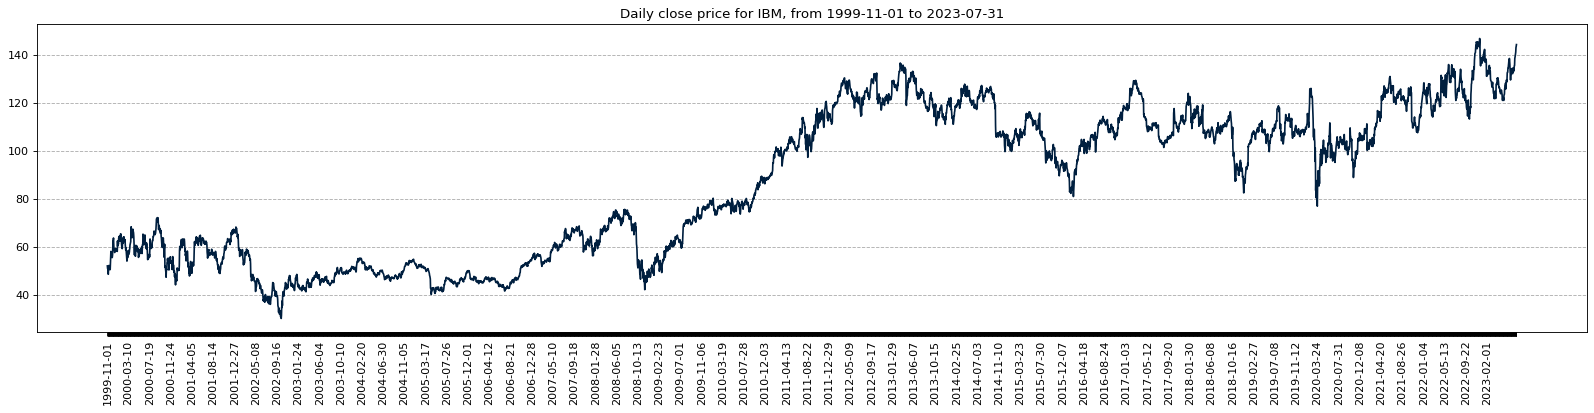

In [78]:
, xticks
# plot
fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i)> config["plots"]["xticks_interval"]) or i==num_data_points ) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0, len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
plt.grid(which="major", axis='y', linestyle="--")
plt.show()

In [60]:
# data


In [68]:
data_close_price = []
for date in data.keys():
   data_close_price.append(float(data[date][config["alpha_vantage"]["key_adjusted_close"]]))

In [69]:
data_close_price[:6]

[144.18, 143.45, 142.97, 141.07, 140.33, 139.54]